# Lab 6B: Backtest Overfitting (CSCV, PBO, PSR/DSR)

## Before You Code: The Big Picture

The #1 problem in quantitative finance: **your backtest looks great, but
it fails in live trading**. Why? **Overfitting**—you optimized
parameters on the same data you tested on. Your “alpha” is actually
selection bias.

> **The Backtest Overfitting Problem**
>
> **The Scenario:** You test 200 trading strategies on 20 years of data.
> One strategy has a Sharpe ratio of 2.5—amazing! You deploy it with
> real money. It loses money immediately. What happened?
>
> **The Problem:** - With 200 tries, **one will look good by pure luck**
> (multiple testing) - In-sample optimization + in-sample testing =
> guaranteed overfitting - Traditional cross-validation doesn’t detect
> this (data leakage across folds)
>
> **The Solution (Bailey & López de Prado):** 1. **CSCV (Combinatorially
> Symmetric Cross-Validation)**: Proper walk-forward splits 2. **PBO
> (Probability of Backtest Overfitting)**: Quantifies selection bias 3.
> **PSR (Probabilistic Sharpe Ratio)**: Tests if Sharpe \> 0 with
> statistical significance 4. **DSR (Deflated Sharpe Ratio)**: Adjusts
> for multiple testing
>
> **The Evidence:** Harvey, Liu & Zhu (2016, RFS): Most published factor
> strategies fail out-of-sample due to p-hacking and multiple testing.
> PBO/PSR help detect this **before** losing real money.

### What You’ll Build Today

By the end of this lab, you will have:

-   ✅ Understanding of why standard backtesting fails
-   ✅ CSCV implementation for honest validation
-   ✅ PBO calculation showing selection bias
-   ✅ PSR/DSR metrics for performance significance
-   ✅ Critical perspective on published trading strategies

**Time estimate:** 90-120 minutes (this is advanced material—take your
time)

> **Why This Matters for Coursework 2**
>
> Your factor replication **must** use walk-forward validation and
> report PBO/PSR. Otherwise, your Sharpe ratio is meaningless—it’s just
> in-sample optimization parading as out-of-sample performance. This lab
> shows you how to do it right.

# Objectives

-   Diagnose backtest overfitting with combinatorially symmetric
    cross‑validation (CSCV)  
-   Estimate Probability of Backtest Overfitting (PBO)  
-   Quantify performance significance via Probabilistic Sharpe Ratio
    (PSR); discuss Deflated Sharpe Ratio (DSR)

> **Note**
>
> This lab follows Bailey & López de Prado’s approach to selection bias:
> CSCV → PBO and PSR/DSR. We implement lightweight utilities and show
> how to compare against `mlfinlab` if available.

# Setup

# Part A — A garden of strategies on pure noise

We simulate `N=200` strategies with no true edge. In a finite sample,
one will “win” in‑sample by chance.

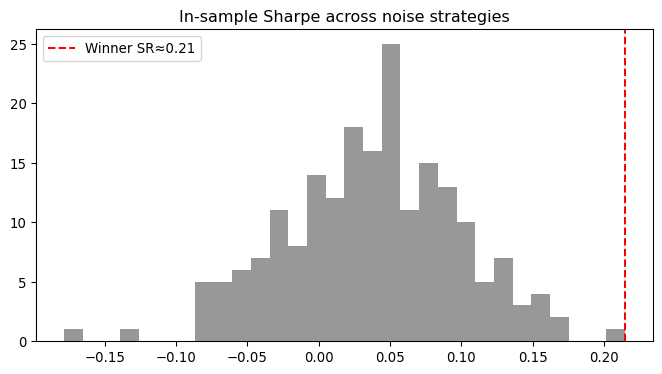

Observation: Even with zero true edge, the best in‑sample Sharpe can
look compelling.

# Part B — CSCV and Probability of Backtest Overfitting (PBO)

We split the time axis into contiguous folds and repeatedly pick the
in‑sample “champion”, then measure its out‑of‑sample rank. PBO is the
fraction of splits where the champion underperforms out‑of‑sample
(negative logit rank).

(0.6, 150)

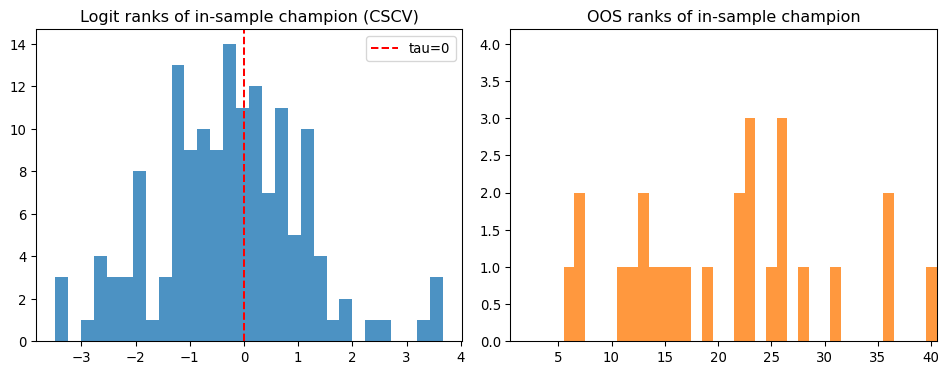

Interpretation: A high PBO indicates that selecting the in‑sample
“winner” is likely to disappoint out‑of‑sample.

# Part C — PSR and discussion of DSR

We compute the Probabilistic Sharpe Ratio (PSR) of the champion against
a 0 benchmark. DSR additionally deflates for selection bias by using a
higher benchmark Sharpe (selection threshold). If `mlfinlab` is
installed, we compare against its DSR.

0.9994357939306875

Optional: compare with `mlfinlab`’s DSR (if available). Note DSR uses an
elevated benchmark Sharpe that accounts for the number of trials and
their correlation (see paper for details).

## Optional — Empirical Selection Benchmark (SR\*)

An intuitive (but approximate) benchmark SR\* is the selection threshold
you would have used to promote a strategy, e.g., the 95th percentile of
candidate SRs or the top‑k cutoff used in model selection. This inflates
the benchmark to reflect the search.

(np.float64(0.13389655969594796), 0.8896047744919638)

> **Tip**
>
> Guidance: PSR answers “what is the probability that the true SR \>
> benchmark SR*?”. DSR raises SR* to deflate for selection bias (many
> trials and correlation among them). When reporting results, disclose
> the number of trials and use CSCV/PBO to evidence robustness.

# Extension — Replace noise with weak‑edge signals

Modify the simulation so a small subset of strategies has a slight
positive mean. Re‑run CSCV/PBO and PSR to see whether evidence
accumulates honestly.

0.6071428571428571

# Deliverables

-   Report the observed PBO and interpret its meaning
-   Report PSR for the selected strategy; if available, compare with DSR
-   Describe how your result changes when a few strategies have a
    genuine (small) edge

## How to Report (Template)

-   Trials: We evaluated N strategies/hyper‑parameters (comment on
    similarity/correlation if relevant).  
-   Selection: In‑sample selection metric = \[Sharpe/alpha/etc.\] with
    CSCV splits (k=10).  
-   Robustness: PBO = X.XX across S splits (show logit rank
    histogram).  
-   Significance: PSR = X.XX vs SR\*=0 (skew=…, kurt=…, n=…)
    -   Optional: DSR = X.XX (assumptions: trials=N, rho=…, length=n).  
-   Data: period, universe, costs/slippage, vintages/release timing.  
-   Decision: \[Promote/Park\], rationale and next steps (e.g., live
    paper trading).

# References

-   Bailey et al. (2015) — Probability of Backtest Overfitting (PBO) and
    CSCV  
-   Bailey and Prado (2014) — Deflated Sharpe Ratio (DSR)  
-   López de Prado, M. — Deflated Sharpe Ratio (DSR), SSRN  
-   White (2000) — Reality Check for data snooping  
-   Hansen (2005) — Superior Predictive Ability (SPA) test  
    \`\`\`

Bailey, David H., Jonathan M. Borwein, Marcos López de Prado, and Qiji
Jim Zhu. 2015. “The Probability of Backtest Overfitting.” *Journal of
Computational Finance*. <https://doi.org/10.2139/ssrn.2326253>.

Bailey, David H., and Marcos López de Prado. 2014. “The Deflated Sharpe
Ratio: Correcting for Selection Bias, Backtest Overfitting and
Non-Normality.” *Journal of Portfolio Management* 40 (5): 94–107.
<https://doi.org/10.2139/ssrn.2460551>.